In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


# Libraries to be used

In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

# Load Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# normalising the dimensions of images to increase the performance of cnn

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Use only 60% of the dataset
train_images, train_labels = train_images[:int(0.1 * len(train_images))], train_labels[:int(0.1 * len(train_labels))]

# Convert images to 3-channel (RGB) and resize to 224x224 for VGG16
def preprocess_images(images):
    images = tf.expand_dims(images, axis=-1)  # Add channel dimension
    images = tf.image.grayscale_to_rgb(images)  # Convert to RGB
    images = tf.image.resize(images, [224, 224])  # Resize to 224x224
    return images.numpy()

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Split train data into train and validation sets (80-20 split of 60% dataset)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
random_index = np.random.randint(0,len(train_images))
random_image = train_images[random_index]
random_label = train_labels[random_index]

# EDA

In [ ]:
temp=np.argmax(train_labels, axis=1)
d={}
for i in range(10):
    d[i]=0
for q in temp:
    d[q]+=1
print(d)
#balanced dataset

{0: 592, 1: 671, 2: 581, 3: 608, 4: 623, 5: 514, 6: 608, 7: 651, 8: 551, 9: 601}


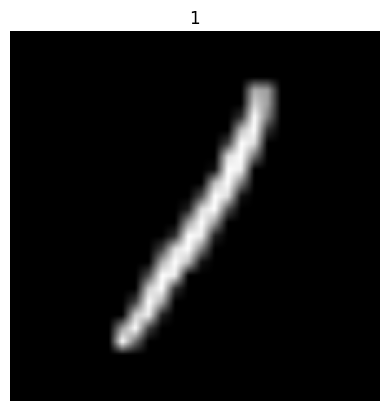

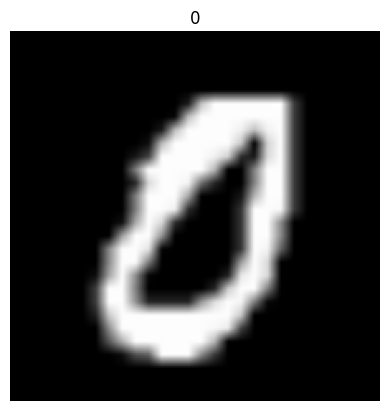

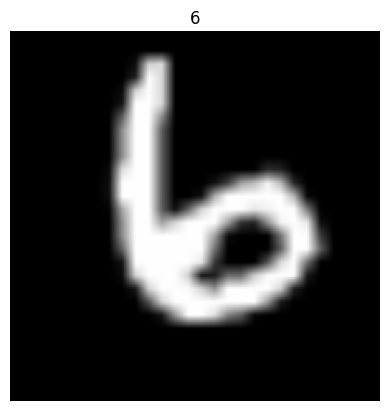

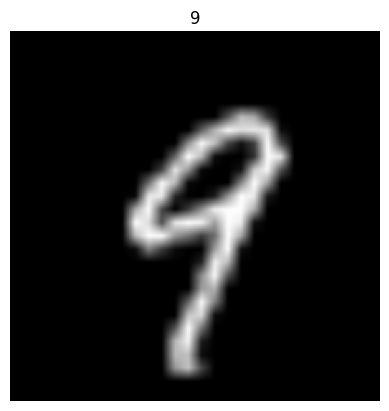

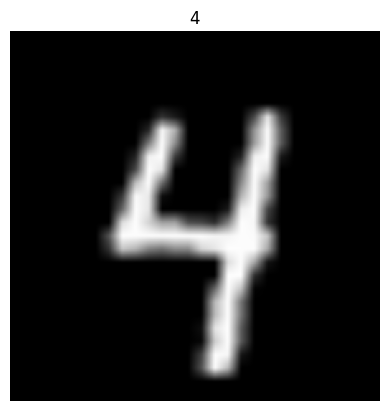

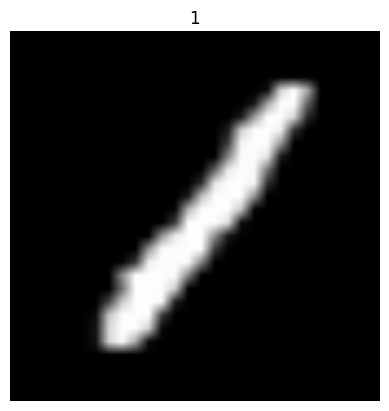

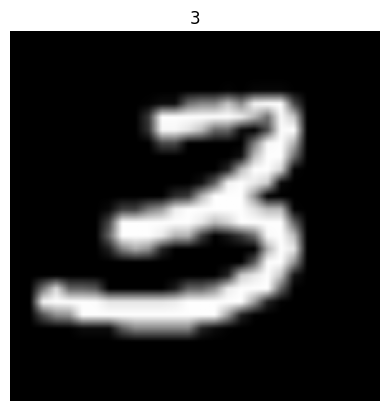

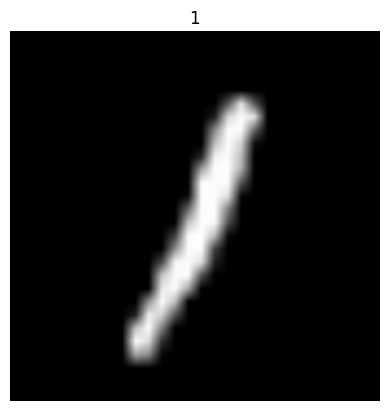

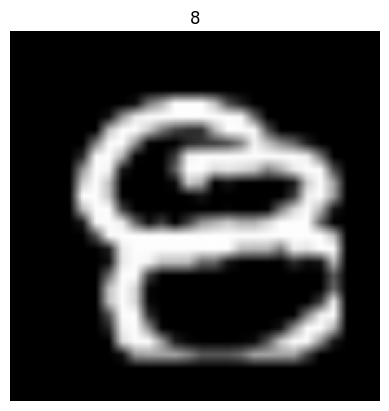

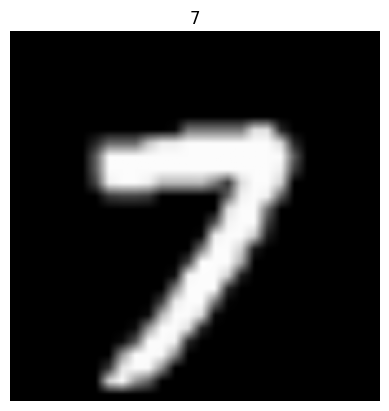

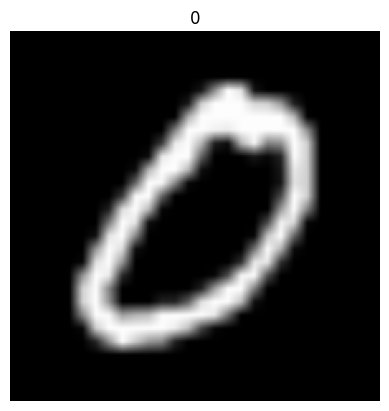

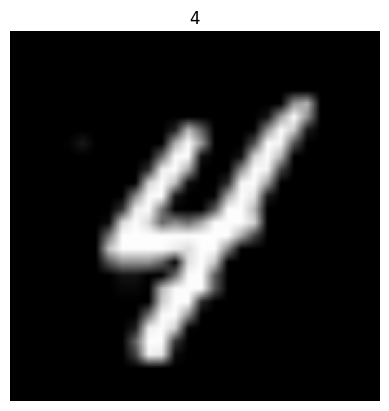

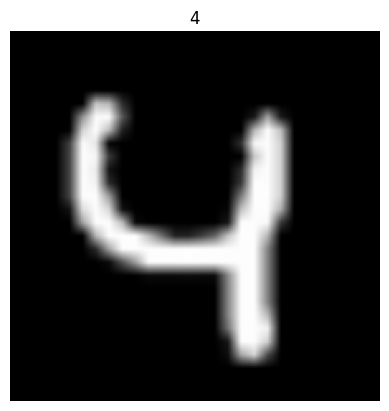

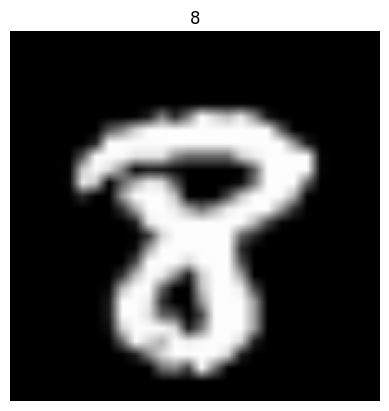

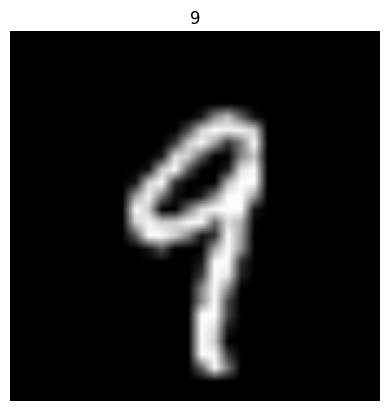

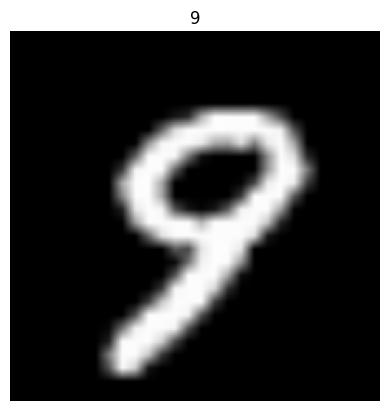

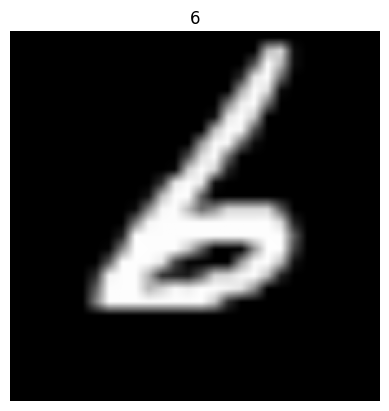

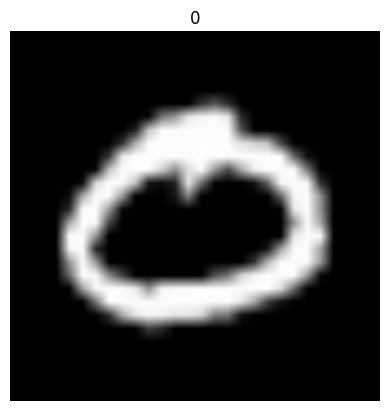

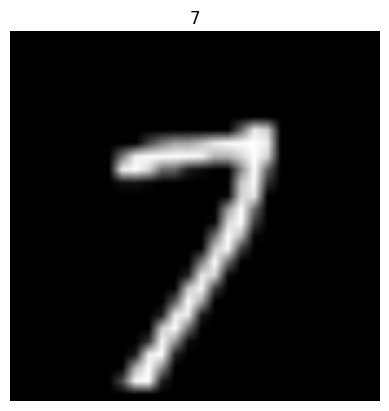

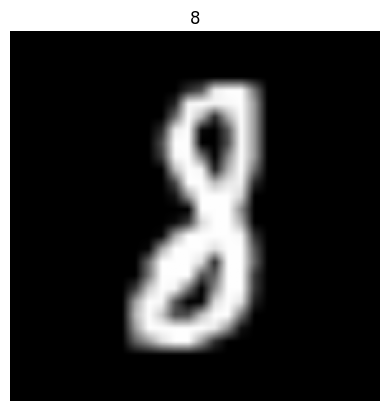

In [ ]:
for i in range(20):
    random_index = np.random.randint(0, len(train_images))
    random_image = train_images[random_index]
    random_label = train_labels[random_index]

    plt.imshow(random_image, cmap='gray')  # Use 'gray' for MNIST images
    plt.axis('off')
    plt.title(np.argmax(random_label))  # Convert one-hot label back to a class index
    plt.show()

In [ ]:
random_image.shape

(224, 224, 3)

In [ ]:
labels = str(list(range(0,10)))
labels

'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]'

In [ ]:
num_samples = 12
random_indices = np.random.choice(train_images.shape[0], num_samples, replace=False)
sample_images = train_images[random_indices]
sample_labels = train_labels[random_indices]

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 base layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = Flatten()(vgg_base.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # 10 classes for MNIST

# Create final model
model = Model(inputs=vgg_base.input, outputs=output)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the model without using ImageDataGenerator
history = model.fit(
    X_train, y_train,  # Directly use the training data
    validation_data=(X_val, y_val),  # Directly use the validation data
    epochs=10,
    batch_size=32  # Set batch size here
)

Epoch 1/10


I0000 00:00:1733860691.609322     104 service.cc:145] XLA service 0x7bb580105750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733860691.609369     104 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733860691.609373     104 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/150 ━━━━━━━━━━━━━━━━━━━━ 43:32 18s/step - accuracy: 0.0938 - loss: 2.5070

I0000 00:00:1733860707.849357     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 57s 262ms/step - accuracy: 0.3393 - loss: 1.9881 - val_accuracy: 0.9492 - val_loss: 0.4647
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 176ms/step - accuracy: 0.6187 - loss: 0.9654 - val_accuracy: 0.9700 - val_loss: 0.2271
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 166ms/step - accuracy: 0.6688 - loss: 0.8045 - val_accuracy: 0.9700 - val_loss: 0.1801
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.7079 - loss: 0.7316 - val_accuracy: 0.9725 - val_loss: 0.1468
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - accuracy: 0.7163 - loss: 0.6900 - val_accuracy: 0.9700 - val_loss: 0.1375
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 170ms/step - accuracy: 0.7196 - loss: 0.6797 - val_accuracy: 0.9750 - val_loss: 0.1097
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 170ms/step - accuracy: 0.7473 - loss: 0.6259 - val_accuracy: 0.9775 - val_loss: 0.0926
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.7272 - loss: 0.6564 - val

# Unsupervised method: TSNE+GMM

In [ ]:
from sklearn.manifold import Isomap, TSNE
from sklearn.decomposition import PCA
# Clustering
from sklearn.mixture import GaussianMixture
import timeit

start = timeit.default_timer()

print(X_train.shape)
X_train_tsne=X_train.reshape(4800,-1)
print(X_train_tsne.shape)
tsne = TSNE(n_components=3,
            n_jobs=-1)
digits_proj = tsne.fit_transform(X_train_tsne)
gmm = GaussianMixture(
    n_components=10)
clusters = gmm.fit_predict(digits_proj)
#Your statements here

stop = timeit.default_timer()

print('Time: ', stop - start)

(4800, 224, 224, 3)
(4800, 150528)
Time:  157.55008647299974


In [ ]:
voter=np.zeros(shape=(10,10))
y_train_label=np.argmax(y_train,axis=1)
for i in range(len(clusters)):
    #print(clusters[i],y_train_label[i])
    voter[clusters[i]][y_train_label[i]]+=1
print(voter)
trans=np.argmax(voter,axis=1)
correct=0
for i in range(len(clusters)):
    if y_train_label[i]==trans[clusters[i]]:
        correct+=1
print(correct/len(clusters))


[[  1.   1.   6. 448.   0.  29.   0.   0.  33.   7.]
 [  0.   3.   9.   4.  13.   0.   0. 470.   1. 159.]
 [  1.   0.   3.   2.  10.   7. 479.   0.   3.   1.]
 [476.   0.   1.   1.   0.   1.   3.   0.   7.   5.]
 [  0. 206.   8.   3.   4.   1.   1.   4.   5.   0.]
 [  0.   2. 429.   1.   1.   1.   0.   4.   2.   0.]
 [  0.   1.   2.   7.   0.   1.   0.   0. 347.   0.]
 [  5.   1.   3.   8.   0. 366.   4.   1.  32.   0.]
 [  0.   1.   1.   3. 472.  10.   1.  25.   8. 299.]
 [  1. 322.   4.   4.   4.   1.   1.   5.   2.   2.]]
0.8364583333333333


# Unsupervised method: reduce training data

In [ ]:
start = timeit.default_timer()

X_train_tsne2=X_train_tsne[:2400][:]
y_train_label2=np.argmax(y_train,axis=1)[:2400]
print(X_train_tsne2.shape)
tsne2 = TSNE(n_components=3,
            n_jobs=-1)
digits_proj2 = tsne2.fit_transform(X_train_tsne2)
gmm2 = GaussianMixture(
    n_components=10)
clusters2 = gmm2.fit_predict(digits_proj2)
#Your statements here

stop = timeit.default_timer()

print('Time: ', stop - start)

voter2=np.zeros(shape=(10,10))

for i in range(len(clusters2)):
    #print(clusters[i],y_train_label[i])
    voter2[clusters2[i]][y_train_label2[i]]+=1
print(voter2)
trans2=np.argmax(voter2,axis=1)
correct2=0
for i in range(len(clusters2)):
    if y_train_label2[i]==trans2[clusters2[i]]:
        correct2+=1
print(correct2/len(clusters2))

(2400, 150528)
Time:  54.03585478500008
[[  1.   2.   0.   4. 243.   7.   2.  10.   3. 174.]
 [  0.   0.   5.   7.   0. 170.   4.   1.   2.   0.]
 [232.   0.   0.   0.   0.   0.   2.   0.   1.   1.]
 [  0.   1.   5. 223.   0.  23.   0.   0.  10.   3.]
 [  1. 147.   3.   0.   0.   1.   0.   5.   1.   0.]
 [  0.   2.   9.   1.  13.   0.   0. 220.   0.  41.]
 [  0.   1. 218.   6.   0.   0.   0.   3.   5.   0.]
 [  0.   0.   1.   2.   6.   6. 241.   0.   4.   0.]
 [  0. 110.   3.   2.   2.   0.   0.   3.   2.   0.]
 [  0.   0.   0.   7.   0.   4.   0.   0. 194.   0.]]
0.8325


In [ ]:

from tensorflow.keras.optimizers import Adagrad

In [ ]:
# Modeling
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,927,370 (68.39 MB)

 Trainable params: 3,212,682 (12.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
loss,accuracy = model.evaluate(X_train,y_train)
print(f"The model accuracy is : {accuracy} \n the model loss : {loss}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9898 - loss: 0.0684
The model accuracy is : 0.9879166483879089 
 the model loss : 0.07202592492103577


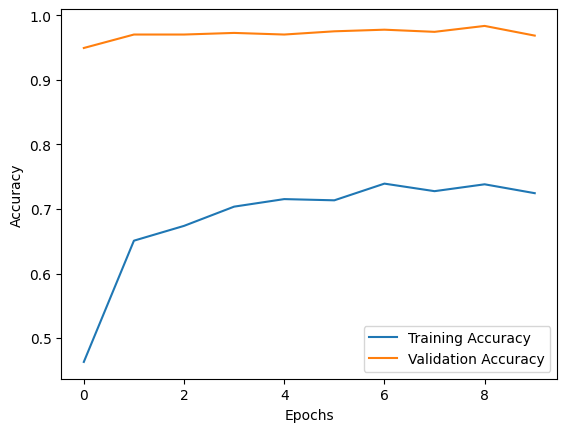

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

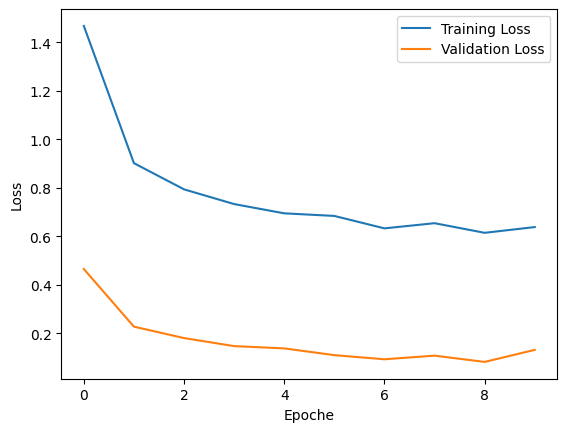

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Predict the class probabilities for the test dataset
predictions = model.predict(X_val)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot to class indices

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
true_labels = np.argmax(y_val, axis=1)  # Convert one-hot encoded to class indices
predicted_labels = np.argmax(predictions, axis=1)  # Already converting probabilities to class indices
correct=0
for i in range(len(true_labels)):
    if true_labels[i]==predicted_labels[i]:
        correct+=1
print(correct/len(true_labels))
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

0.9683333333333334


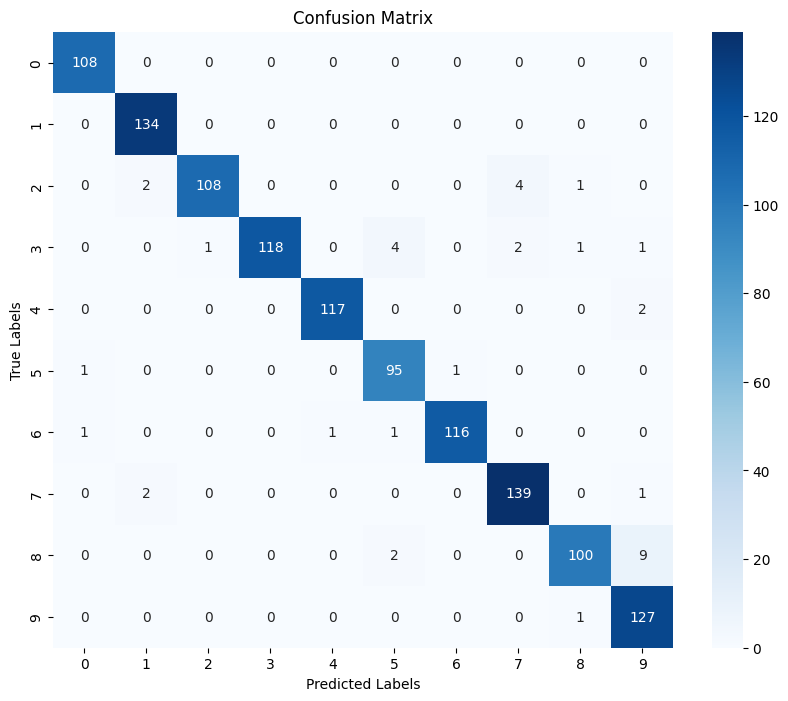

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()